## This is a prototype of our model that extracts EEG data and determines an emotional state that is either negative, neutral, or positive. This code is meant to demonstrate the possibility that EEG data can determine mental states. If EEG data, can determine mental states than it proves that it's possible to examine theta and delta power, which comes from EEG data, can determine a person's suicide risk.

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

# Load the dataset
data = pd.read_csv(r"C:\Users\shiva\imagemorphing\emotions.csv")

# Map labels to numerical values
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Splitting Data
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compiling the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=32, verbose=2)

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Prediction
y_pred = np.argmax(model.predict(X_test), axis=1)

# Convert numerical predictions back to original labels
predicted_labels = label_encoder.inverse_transform(y_pred)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Epoch 1/50
28/28 - 3s - loss: 1.1554 - accuracy: 0.7587 - val_loss: 0.6378 - val_accuracy: 0.9062 - 3s/epoch - 111ms/step
Epoch 2/50
28/28 - 0s - loss: 0.7061 - accuracy: 0.8547 - val_loss: 0.6984 - val_accuracy: 0.8906 - 424ms/epoch - 15ms/step
Epoch 3/50
28/28 - 0s - loss: 0.5569 - accuracy: 0.8827 - val_loss: 0.6212 - val_accuracy: 0.9062 - 428ms/epoch - 15ms/step
Epoch 4/50
28/28 - 0s - loss: 0.4156 - accuracy: 0.9006 - val_loss: 0.5581 - val_accuracy: 0.9089 - 413ms/epoch - 15ms/step
Epoch 5/50
28/28 - 0s - loss: 0.3247 - accuracy: 0.9307 - val_loss: 0.3171 - val_accuracy: 0.9193 - 425ms/epoch - 15ms/step
Epoch 6/50
28/28 - 0s - loss: 0.2151 - accuracy: 0.9352 - val_loss: 0.3192 - val_accuracy: 0.9115 - 429ms/epoch - 15ms/step
Epoch 7/50
28/28 - 0s - loss: 0.2227 - accuracy: 0.9330 - val_loss: 0.4149 - val_accuracy: 0.9089 - 426ms/epoch - 15ms/step
Epoch 8/50
28/28 - 0s - loss: 0.2606 - accuracy: 0.9363 - val_loss: 0.3344 - val_accuracy: 0.9167 - 416ms/epoch - 15ms/step
Epoch 9/50

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

27/27 [==============================] - 0s 6ms/step - loss: 0.4629 - accuracy: 0.9519
Test Loss: 0.46293020248413086, Test Accuracy: 0.9519343376159668


In [15]:
#further testing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [16]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [17]:
# Function to plot the ROC curve
def plot_roc_curve(y_true, y_pred, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))

67/67 [==============================] - 0s 5ms/step


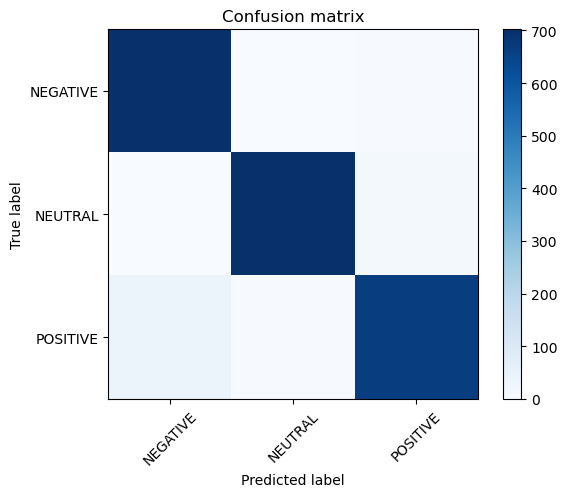

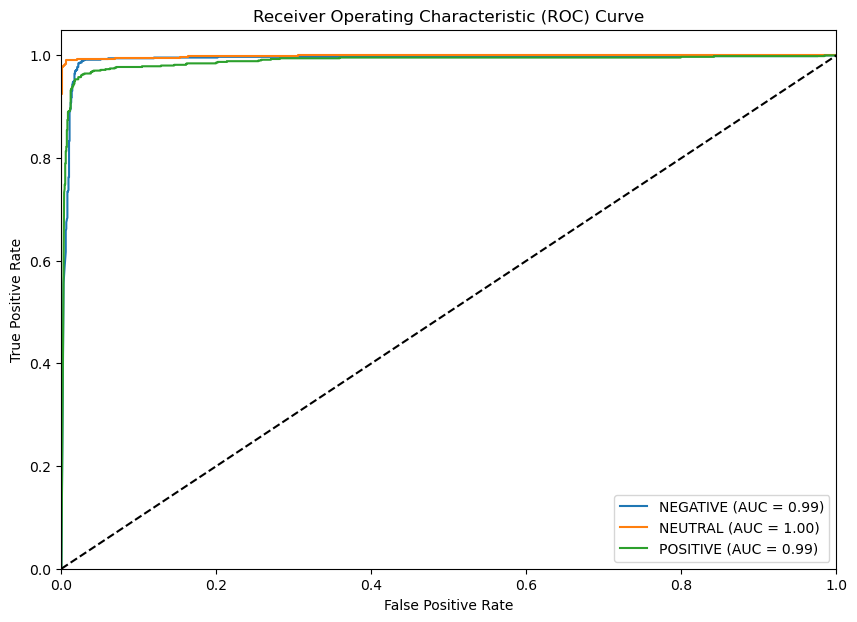

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to plot the ROC curve
def plot_roc_curve(y_true, y_pred, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))

    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Testing the model on new data
new_data = pd.read_csv(r"C:\Users\shiva\imagemorphing\emotions.csv")  # Replace with the path to your new data
new_data['label'] = label_encoder.transform(new_data['label'])  # Use the same label encoder

X_new = new_data.drop('label', axis=1)
y_new = new_data['label']

X_new = scaler.transform(X_new)

# Make predictions
predictions = model.predict(X_new)
predicted_labels = np.argmax(predictions, axis=1)

# Plot confusion matrix
plot_confusion_matrix(y_new, predicted_labels, label_encoder.classes_)

# Plot ROC curve
plot_roc_curve(y_new, predictions, label_encoder.classes_)
